## Demo using the gymnasium environment for dynamic foraging


Install some helper plotting functions

In [3]:
try:
    import aind_dynamic_foraging_basic_analysis
except:
    !pip install aind-dynamic-foraging-basic-analysis --quiet

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np

from aind_dynamic_foraging_basic_analysis import plot_foraging_session

from aind_behavior_gym.dynamic_foraging.agent.random_agent import RandomAgent, RandomAgentBiasedIgnore
from aind_behavior_gym.dynamic_foraging.task.coupled_block_task import CoupledBlockTask
from aind_behavior_gym.dynamic_foraging.task.random_walk_task import RandomWalkTask
from aind_behavior_gym.dynamic_foraging.task.uncoupled_block_task import UncoupledBlockTask


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### A random agent performing the Coupled task

In [5]:
task = CoupledBlockTask(allow_ignore=False, reward_baiting=True, seed=42)
agent = RandomAgent(seed=42)
agent.perform(task)

Plot the session

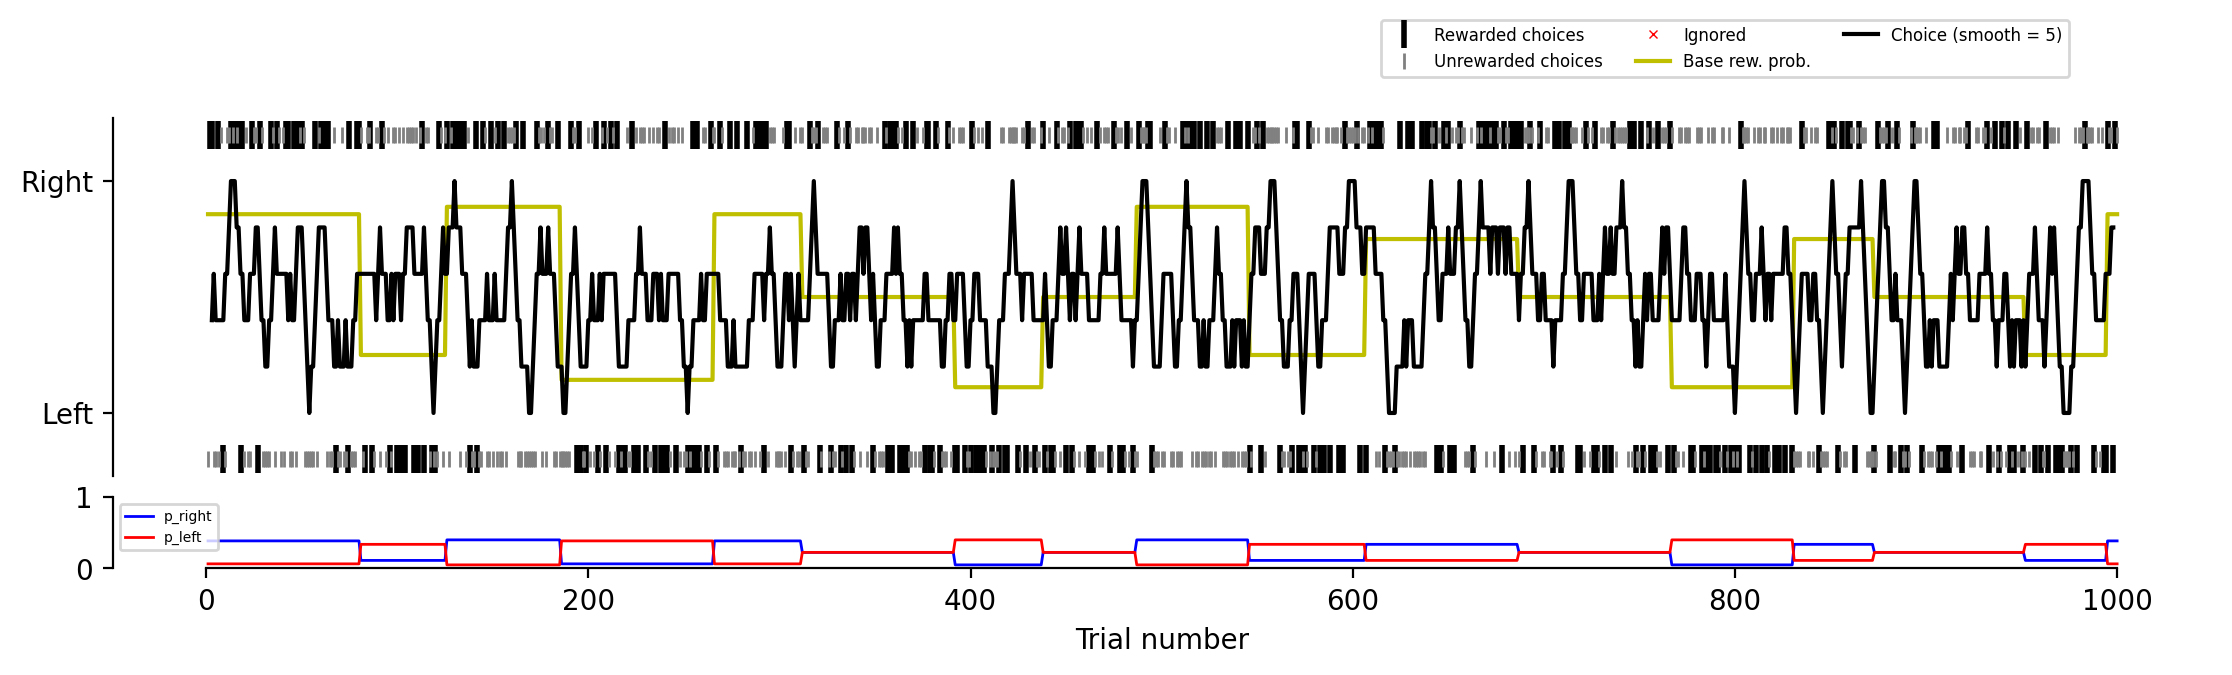

In [6]:
fig, _ = plot_foraging_session(
    choice_history=task.get_choice_history(),
    reward_history=task.get_reward_history(),
    p_reward=task.get_p_reward(),
)

### A left-biased agent (with ignore) performing the Uncoupled task

In [7]:
task = UncoupledBlockTask(
    rwd_prob_array=[0.1, 0.5, 0.9],
    block_min=20,
    block_max=35,
    persev_add=True,
    perseverative_limit=4,
    max_block_tally=4,
    allow_ignore=True,
    num_trials=1000,
    seed=42,
)
agent = RandomAgentBiasedIgnore(seed=42)
agent.perform(task)

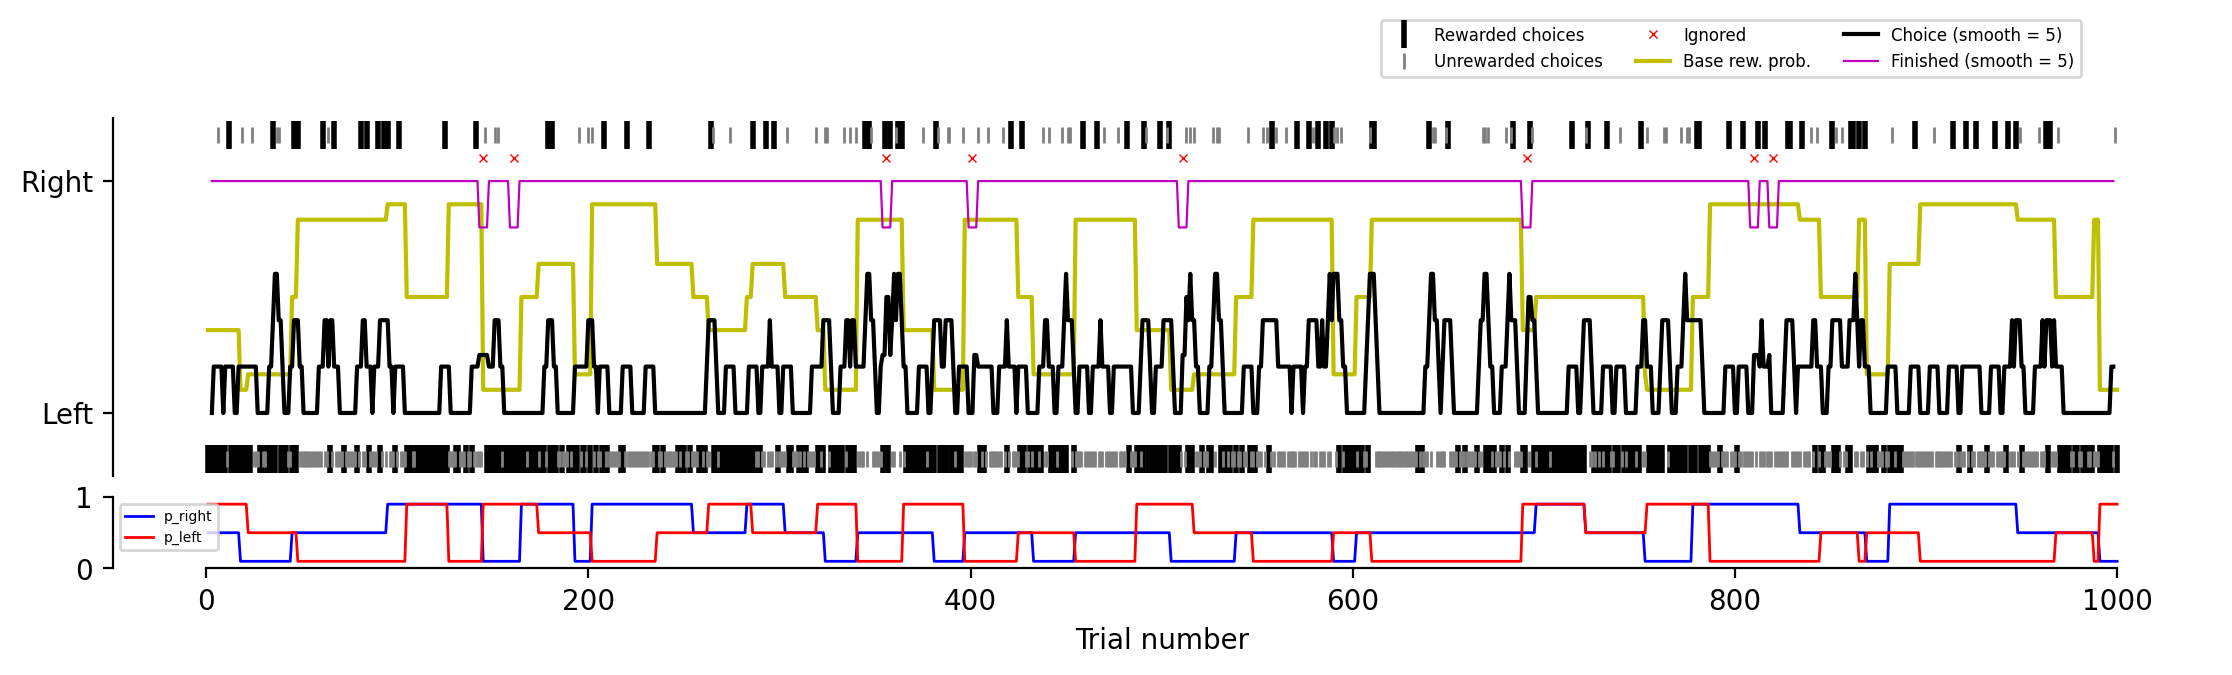

In [8]:
fig, _ = plot_foraging_session(
    choice_history=task.get_choice_history(),
    reward_history=task.get_reward_history(),
    p_reward=task.get_p_reward(),
)

Also show reasons of block transitions

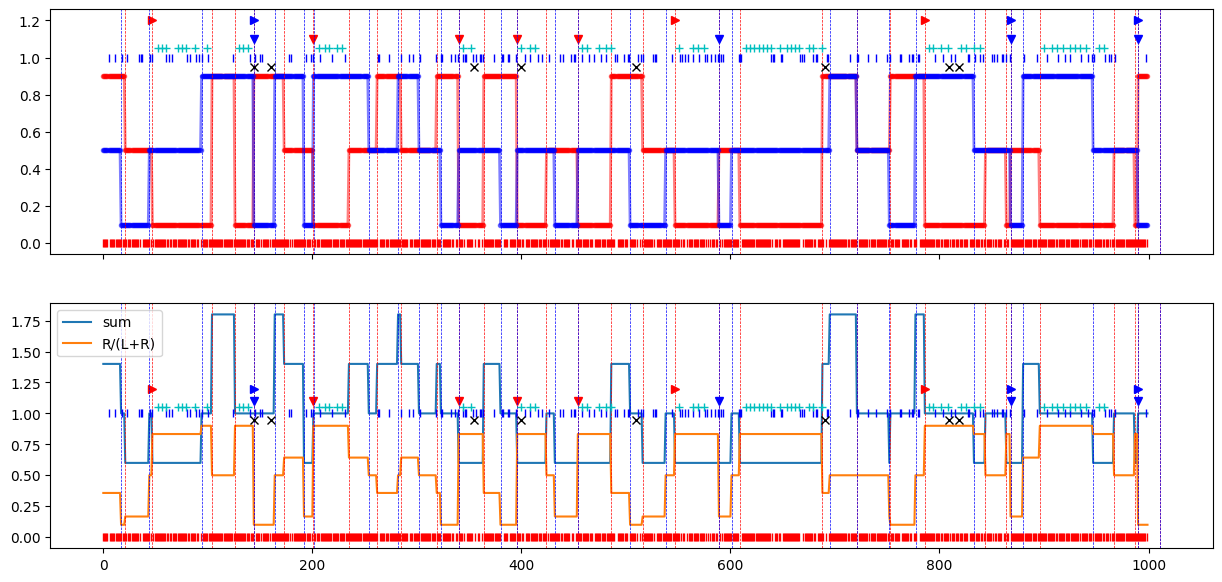

In [9]:
task.plot_reward_schedule();

### A random agent performing a random walk task

In [10]:
task = RandomWalkTask(
    p_min=[0.1, 0.1],  # The lower bound of p_L and p_R
    p_max=[0.9, 0.9],  # The upper bound
    sigma=[0.1, 0.1],  # The mean of each step of the random walk
    mean=[0, 0],  # The mean of each step of the random walk
    num_trials=1000,
    allow_ignore=False,
    seed=42,
)
agent = RandomAgent(seed=42)
agent.perform(task)

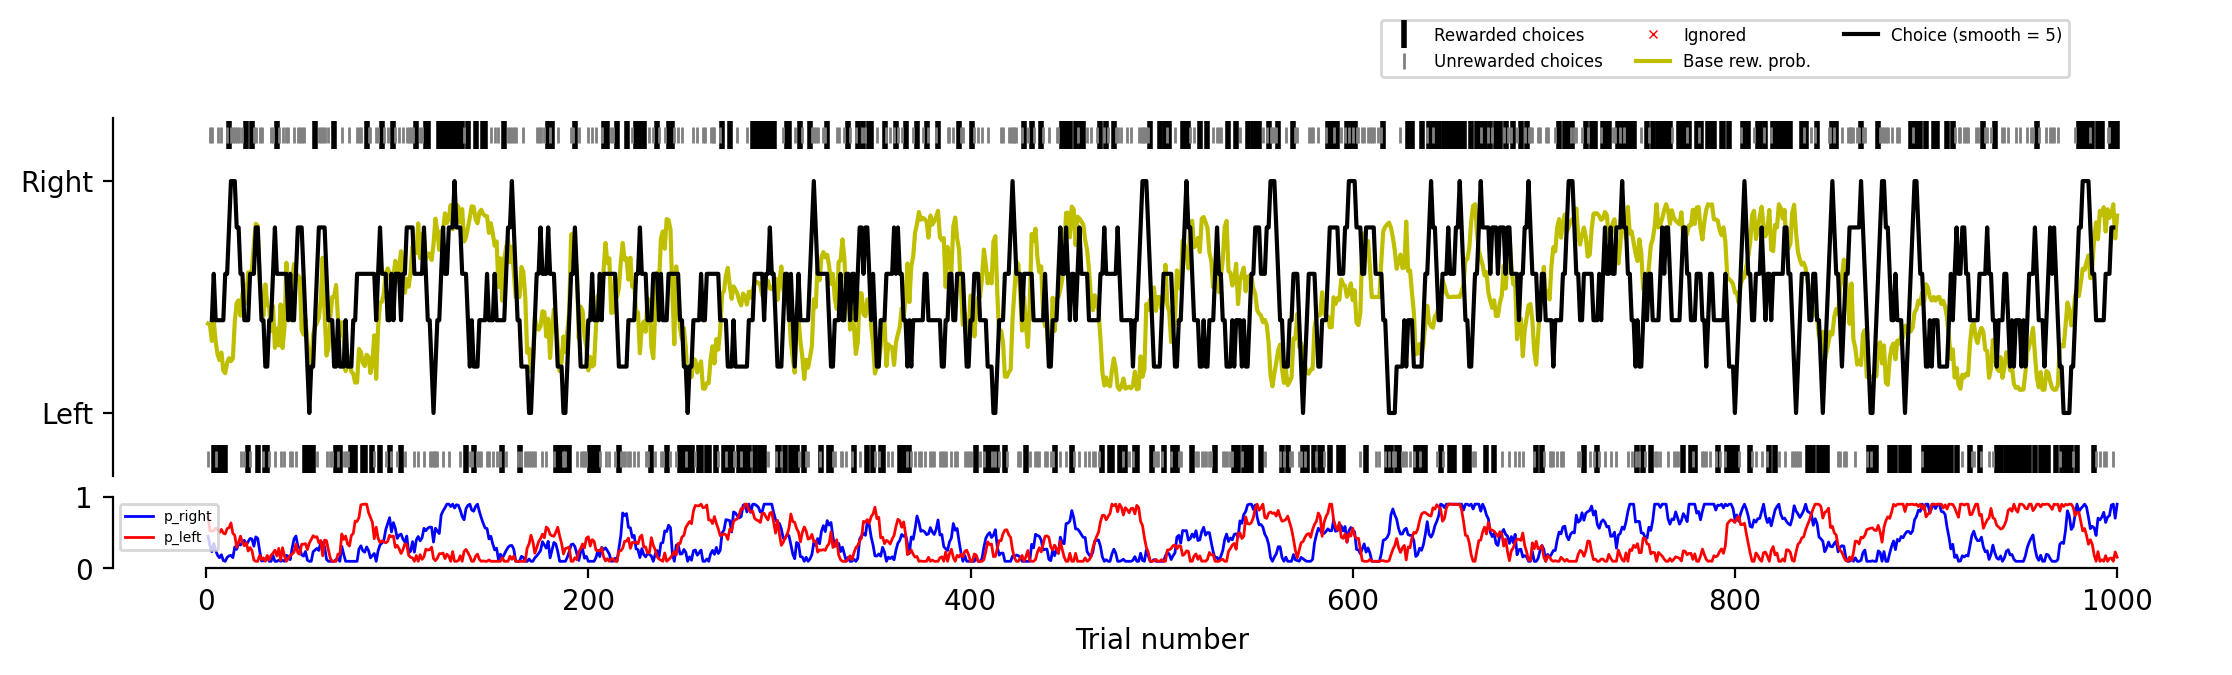

In [11]:
fig, _ = plot_foraging_session(
    choice_history=task.get_choice_history(),
    reward_history=task.get_reward_history(),
    p_reward=task.get_p_reward(),
)

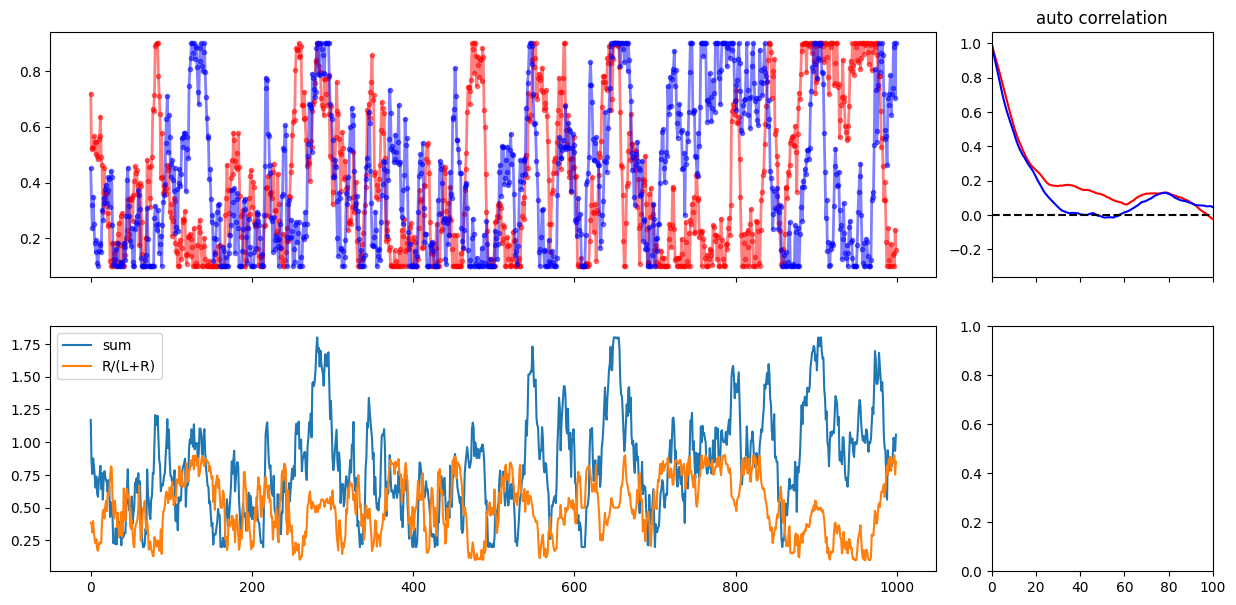

In [12]:
task.plot_reward_schedule();